<a href="https://colab.research.google.com/github/sdasilvas/NGG6050/blob/main/DaSilva_9.16.24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Do a post-hoc power analysis to determine the number of data samples needed to achieve 80% power for a series of possible effect sizes.

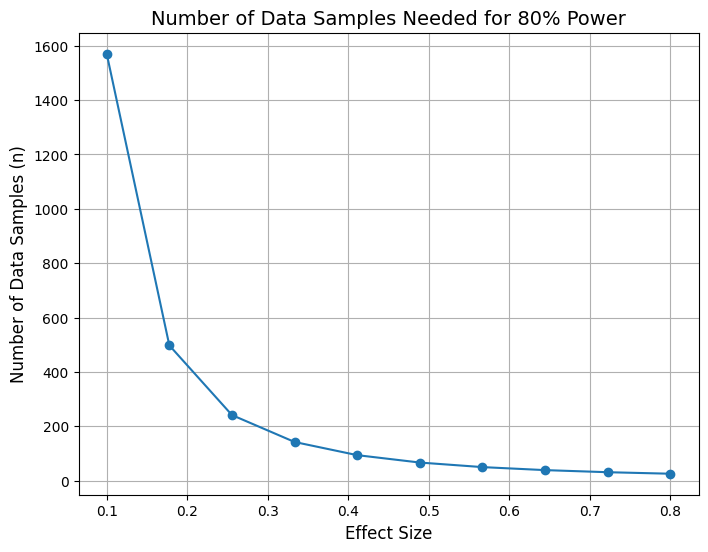

Effect Size: 0.10, Required Samples for 80% Power: 1570.73
Effect Size: 0.18, Required Samples for 80% Power: 497.65
Effect Size: 0.26, Required Samples for 80% Power: 241.33
Effect Size: 0.33, Required Samples for 80% Power: 142.25
Effect Size: 0.41, Required Samples for 80% Power: 93.85
Effect Size: 0.49, Required Samples for 80% Power: 66.65
Effect Size: 0.57, Required Samples for 80% Power: 49.86
Effect Size: 0.64, Required Samples for 80% Power: 38.78
Effect Size: 0.72, Required Samples for 80% Power: 31.09
Effect Size: 0.80, Required Samples for 80% Power: 25.52


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm, spearmanr
from statsmodels.stats.power import TTestIndPower

# Function to simulate LC (Poisson) and pupil (Gaussian) data and compute Spearman correlation
def simulate_data(n, lam, mean, std):
    """
    Simulate LC (Poisson) and pupil (Gaussian) data and return Spearman correlation coefficients.

    Parameters:
    n: int - number of data points in one session
    lam: float - lambda (rate) for Poisson distribution (LC spiking data)
    mean: float - mean for Gaussian distribution (pupil data)
    std: float - standard deviation for Gaussian distribution (pupil data)

    Returns:
    float - Spearman correlation coefficient between LC spiking and pupil diameter
    """
    lc_data = poisson.rvs(lam, size=n)
    pupil_data = norm.rvs(loc=mean, scale=std, size=n)
    corr, _ = spearmanr(lc_data, pupil_data)  # Spearman correlation
    return corr

# Function to calculate number of samples for given effect sizes and power
def calculate_power_analysis(effect_sizes, alpha=0.05, power=0.8):
    """
    Calculate the number of data samples required for 80% power as a function of effect sizes.

    Parameters:
    effect_sizes: list or array - effect sizes to compute power for
    alpha: float - significance level
    power: float - desired power level

    Returns:
    list - number of data samples needed for each effect size
    """
    power_analysis = TTestIndPower()
    required_samples = []
    for effect_size in effect_sizes:
        n_samples = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
        required_samples.append(n_samples)
    return required_samples

# Simulation parameters
n_sessions = 1000   # Number of experimental sessions to simulate
n = 100             # Number of data points per session
lc_lambda = 5       # Poisson rate for LC spiking data
pupil_mean = 3.5    # Mean for Gaussian pupil data
pupil_std = 1.2     # Standard deviation for Gaussian pupil data

# Simulate Spearman correlation coefficients for null distribution
corrs_null = np.array([simulate_data(n, lc_lambda, pupil_mean, pupil_std) for _ in range(n_sessions)])

# Effect sizes to test
effect_sizes = np.linspace(0.1, 0.8, 10)

# Calculate number of samples needed for 80% power for each effect size
required_samples = calculate_power_analysis(effect_sizes)

# Plot the number of samples needed as a function of effect size
plt.figure(figsize=(8, 6))
plt.plot(effect_sizes, required_samples, marker='o', linestyle='-')
plt.title('Number of Data Samples Needed for 80% Power', fontsize=14)
plt.xlabel('Effect Size', fontsize=12)
plt.ylabel('Number of Data Samples (n)', fontsize=12)
plt.grid(True)
plt.show()

# Optionally print the results for further analysis
for es, n_samples in zip(effect_sizes, required_samples):
    print(f"Effect Size: {es:.2f}, Required Samples for 80% Power: {n_samples:.2f}")


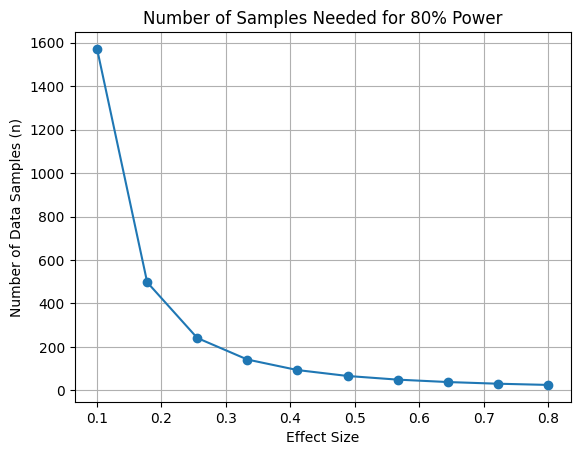

Effect Size: 0.10, Required Samples for 80% Power: 1570.73
Effect Size: 0.18, Required Samples for 80% Power: 497.65
Effect Size: 0.26, Required Samples for 80% Power: 241.33
Effect Size: 0.33, Required Samples for 80% Power: 142.25
Effect Size: 0.41, Required Samples for 80% Power: 93.85
Effect Size: 0.49, Required Samples for 80% Power: 66.65
Effect Size: 0.57, Required Samples for 80% Power: 49.86
Effect Size: 0.64, Required Samples for 80% Power: 38.78
Effect Size: 0.72, Required Samples for 80% Power: 31.09
Effect Size: 0.80, Required Samples for 80% Power: 25.52


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm, pearsonr
from statsmodels.stats.power import TTestIndPower

# Function to simulate the data and compute correlation coefficients
def simulate_data(n, lam, mean, std):
    """
    Simulate LC (Poisson) and pupil (Gaussian) data and return correlation coefficients.

    Parameters:
    n: int - number of data points in one session
    lam: float - lambda (rate) for Poisson distribution (LC spiking data)
    mean: float - mean for Gaussian distribution (pupil data)
    std: float - standard deviation for Gaussian distribution (pupil data)

    Returns:
    float - correlation coefficient between LC spiking and pupil diameter
    """
    lc_data = poisson.rvs(lam, size=n)
    pupil_data = norm.rvs(loc=mean, scale=std, size=n)
    corr, _ = pearsonr(lc_data, pupil_data)
    return corr

# Function to calculate number of samples for given effect sizes and power
def calculate_power_analysis(effect_sizes, alpha=0.05, power=0.8):
    """
    Calculate the number of data samples required for 80% power as a function of effect sizes.

    Parameters:
    effect_sizes: list or array - effect sizes to compute power for
    alpha: float - significance level
    power: float - desired power level

    Returns:
    list - number of data samples needed for each effect size
    """
    power_analysis = TTestIndPower()
    required_samples = []
    for effect_size in effect_sizes:
        n_samples = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
        required_samples.append(n_samples)
    return required_samples

# Simulation parameters
n_sessions = 1000   # Number of experimental sessions to simulate
n = 100             # Number of data points per session
lc_lambda = 5       # Poisson rate for LC spiking data
pupil_mean = 3.5    # Mean for Gaussian pupil data
pupil_std = 1.2     # Standard deviation for Gaussian pupil data

# Simulate correlation coefficients for null distribution
corrs_null = np.array([simulate_data(n, lc_lambda, pupil_mean, pupil_std) for _ in range(n_sessions)])

# Effect sizes to test
effect_sizes = np.linspace(0.1, 0.8, 10)

# Calculate number of samples needed for 80% power for each effect size
required_samples = calculate_power_analysis(effect_sizes)

# Plot the number of samples needed as a function of effect size
plt.plot(effect_sizes, required_samples, marker='o')
plt.title('Number of Samples Needed for 80% Power')
plt.xlabel('Effect Size')
plt.ylabel('Number of Data Samples (n)')
plt.grid(True)
plt.show()

# Optionally print the results for further analysis
for es, n_samples in zip(effect_sizes, required_samples):
    print(f"Effect Size: {es:.2f}, Required Samples for 80% Power: {n_samples:.2f}")


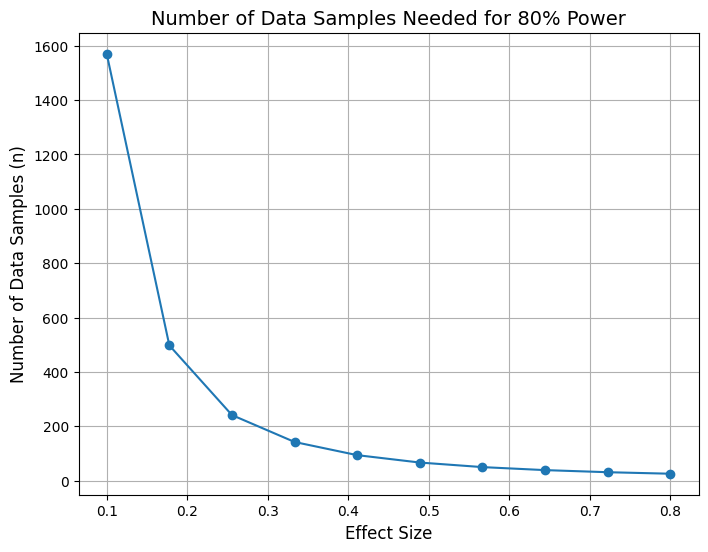

Effect Size: 0.10, Required Samples for 80% Power: 1570.73
Effect Size: 0.18, Required Samples for 80% Power: 497.65
Effect Size: 0.26, Required Samples for 80% Power: 241.33
Effect Size: 0.33, Required Samples for 80% Power: 142.25
Effect Size: 0.41, Required Samples for 80% Power: 93.85
Effect Size: 0.49, Required Samples for 80% Power: 66.65
Effect Size: 0.57, Required Samples for 80% Power: 49.86
Effect Size: 0.64, Required Samples for 80% Power: 38.78
Effect Size: 0.72, Required Samples for 80% Power: 31.09
Effect Size: 0.80, Required Samples for 80% Power: 25.52


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Define the function to perform post-hoc power analysis
def post_hoc_power_analysis(effect_sizes, alpha=0.05, power=0.8):
    """
    Perform post-hoc power analysis to determine the number of data samples needed
    for 80% power given a series of effect sizes.

    Parameters:
    effect_sizes (array-like): Series of effect sizes to test.
    alpha (float): Significance level (default 0.05).
    power (float): Desired power (default 0.8).

    Returns:
    list: Number of samples needed for each effect size.
    """
    power_analysis = TTestIndPower()
    required_samples = []

    for effect_size in effect_sizes:
        # Solve for the required number of samples for each effect size
        n_samples = power_analysis.solve_power(effect_size=effect_size,
                                               alpha=alpha, power=power,
                                               alternative='two-sided')
        required_samples.append(n_samples)

    return required_samples

# Define a series of effect sizes to test
effect_sizes = np.linspace(0.1, 0.8, 10)  # Effect sizes from 0.1 to 0.8

# Perform post-hoc power analysis
required_samples = post_hoc_power_analysis(effect_sizes)

# Plot the number of data samples needed for 80% power
plt.figure(figsize=(8, 6))
plt.plot(effect_sizes, required_samples, marker='o', linestyle='-')
plt.title('Number of Data Samples Needed for 80% Power', fontsize=14)
plt.xlabel('Effect Size', fontsize=12)
plt.ylabel('Number of Data Samples (n)', fontsize=12)
plt.grid(True)
plt.show()

# Optionally, print out the results
for es, n_samples in zip(effect_sizes, required_samples):
    print(f"Effect Size: {es:.2f}, Required Samples for 80% Power: {n_samples:.2f}")
